<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/gendata_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"z1" : normal(0, 1, 50000),
                     "z2" : normal(0, 1, 50000),
                     "z3" : normal(0, 1, 50000)})
data

,z1,z2,z3
0,1.755268,0.603256,-0.644677
1,-0.069977,-0.985600,0.083586
2,-0.915058,1.965680,-0.859713
3,-0.515122,0.862276,0.422692
4,0.349671,-0.515620,-0.161913
...,...,...,...
49995,-0.114203,-0.031857,-1.158349
49996,0.681361,0.032801,0.129740
49997,-0.277224,-0.208102,-1.153839
49998,2.757269,-2.049710,2.152415


In [27]:
z1 = data['z1']
z2 = data['z2']
z3 = data['z3']

x1 = z1
x2 = z2
x3 = z3

new_data = pd.DataFrame({"x1" : data['z1'],
                         "x2" : data['z2'],
                         "x3" : data['z3'],
                         "e"  : np.random.normal(0, x1**6, 50000)})

n=70
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=new_data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:].reset_index(drop=True)
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy().reset_index(drop=True)
        data_copy=pd.DataFrame({"":[]})
    #=========================

    table_data = pd.DataFrame({'x1' : data_new['x1'],
                               'x2' : data_new['x2'],
                               'x3' : data_new['x3'],
                               'e'  : data_new['e']})
  

    table_data['Y'] = 5 + 10*table_data['x1'] + table_data['x2'] + table_data['x3'] + table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

x = table_data_all[['x1', 'x2', 'x3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({'x1'   : table_data_all['x1'],
                               'x2'   : table_data_all['x2'],
                               'x3'   : table_data_all['x3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y'] - table_data_new['y_hat']
table_data_new

x1        x2        x3  ...          Y      y_hat      e_hat
rep  index                                ...                                 
0.0  0.0    0.507134 -0.065809  0.684101  ...  10.706028   8.279836   2.426193
     1.0    0.710040 -0.515201  1.464146  ...  13.108611   9.234624   3.873987
     2.0   -0.061549  0.403865  1.585548  ...   6.373922   5.693362   0.680560
     3.0   -0.280327 -0.687356  0.425462  ...   1.935785   1.408769   0.527016
     4.0   -1.526176 -2.362021 -0.397232  ... -12.699788 -11.035043  -1.664745
...              ...       ...       ...  ...        ...        ...        ...
99.0 65.0   1.649198 -2.003851 -0.159256  ...  17.469964  12.038320   5.431645
     66.0  -1.126524  0.339033 -1.289227  ...  -6.428097  -3.418042  -3.010055
     67.0  -0.284967 -0.069397  0.122534  ...   2.204079   2.425959  -0.221881
     68.0   2.009265  1.031159  0.586569  ... -41.644954  20.900018 -62.544971
     69.0  -0.990167  0.855247  0.362782  ...  -4.819279  -0.576287  -4.242992

[7000 rows x 7 columns]

In [28]:
table_data_new.to_csv('sampling_100rep_n70_x6_norm_sas.csv')
files.download('sampling_100rep_n70_x6_norm_sas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

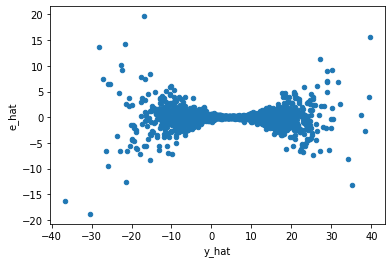

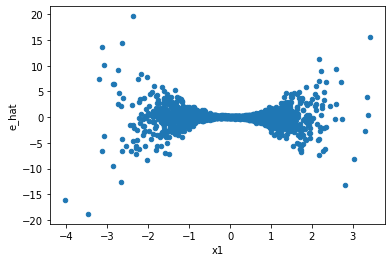

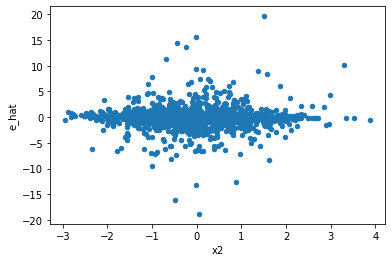

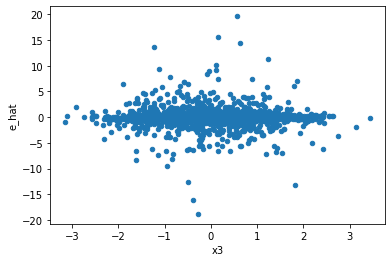

In [ ]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x3', y='e_hat', kind = 'scatter')